In [2]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
from scipy.linalg import expm

In [3]:
def stream_path(n,alpha):
    B = np.matrix(np.zeros((n,n), dtype='complex'))
    for x in range(n-1):
        B[x,x+1] = np.exp(1j*alpha)
    
    return B + B.H

def switch_path(n,alpha):
    B = np.matrix(np.zeros((n,n), dtype='complex'))
    for x in range(n-1):
        if (x%2)==0:
            B[x,x+1] = np.exp(1j*alpha)
        else:
            B[x,x+1] = np.exp(-1j*alpha)
    
    return B + B.H

def evolution(H,t,initial):
    U = expm(1j*H*t)
    initial = np.array(U@initial)
    
    return np.abs(initial)**2

def inf_line_bessel(x0,nx,t,alpha):
    domain = np.arange(x0 - nx, x0 + nx + 1)
    psi = np.zeros([2*nx + 1,1], dtype='complex')
    
    for x in range(2*nx + 1):
        psi[x,0] = 1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t)/np.sqrt(2)
        psi[x,0] += 1j**(np.abs(domain[x]-x0-1))*sp.jv(np.abs(domain[x] - x0 - 1), 2*t)/np.sqrt(2)
        
    return np.abs(np.array(psi))**2

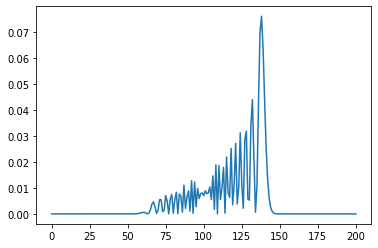

In [4]:
n = 201
alpha = (np.pi)/2
H = stream_path(n,alpha)

t = 20


initial = np.zeros((n,1))
initial[n//2] = 1/np.sqrt(2)
initial[n//2+1] = 1/np.sqrt(2)

psi_original = evolution(H, t, initial)
plt.plot(psi_original)

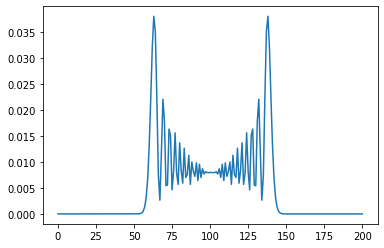

In [5]:
x0 = 0
nx = 100
t  = 20
alpha=np.pi/2

psi_bessel = inf_line_bessel(x0,nx,t,alpha)
plt.plot(psi_bessel)

In [8]:
def inf_line_bessel_oriented(x0,nx,t,alpha):
    domain = np.arange(x0 - nx, x0 + nx + 1)
    psi = np.zeros([2*nx + 1,1], dtype='complex')
    
    for x in range(2*nx + 1):
        psi[x,0] = (np.exp(-1j*alpha/2))*1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t)/np.sqrt(2)
        psi[x,0] += (np.exp(1j*alpha/2))*1j**(np.abs(domain[x]-x0-1))*sp.jv(np.abs(domain[x] - x0 - 1), 2*t)/np.sqrt(2)
        
    return np.abs(np.array(psi))**2

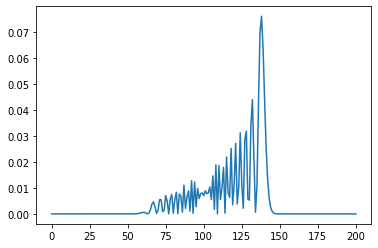

In [9]:
x0 = 0
nx = 100
t  = 20
alpha=np.pi/2

psi_oriented = inf_line_bessel_oriented(x0,nx,t,alpha)
plt.plot(psi_oriented)

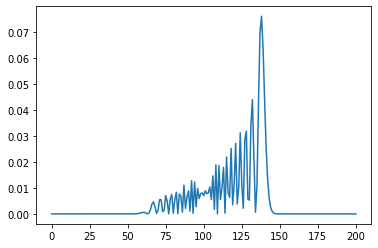

In [11]:
n = 201
alpha = (np.pi)/2
H = stream_path(n,alpha)

t = 20


initial = np.zeros((n,1))
initial[n//2] = 1/np.sqrt(2)
initial[n//2+1] = 1/np.sqrt(2)

psi_original = evolution(H, t, initial)
plt.plot(psi_original)